# scikit-learn

Scikit-learn is a library for doing machine learning in Python. Machine learning is a subfield of Artificial Intelligence. Any machine learning problem is based on three concepts: 

*   Define a task, T to solve. For example, build a spam filter that learns to classify e-mails whether it is a spam.
*   Need some experience, E, to learn to perform the task. For a spam filter, experience comes as a set of emails, manually classified by a human.
*   Need to measure performance, P, to know how well we are solving the task.

In the following sections, we will learn how to install scikit-learn and its environment. Next, we will introduce key machine learning concepts while solving a simple practical task.

On a real problem, you will want to use scikit-learn that has a good optimization algorithm.

1.	Installing scikit-learn

In the case of Debian-based operating systems, such as Ubuntu, you can install the packages by running the following commands:

pip install scikit-learn

Do note that you may need to install other support packages like urllib3 and scipy.

Since we are using colab, scikit-learn has already been installed on colab instances, so will not need to do any additional installation.


**Datasets**

We will use the well-known datasets called the Iris flower dataset. You can read more about it in https://en.wikipedia.org/wiki/Iris_flower_data_set.
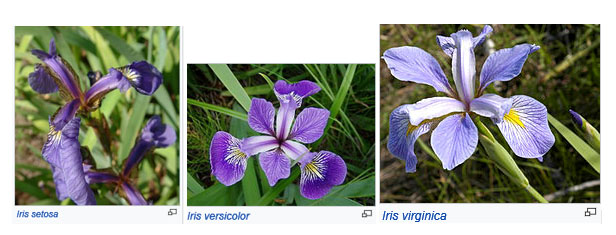

We have a total of 3 species of Iris (Iris setosa, Iris virginica, and Iris versicolor). For each species, 50 samples are collected. For each sample, 4 items are collected, namely length, widths of sepals and petals.

The dataset contains a set of 150 records with 5 columns namely Petal Length, Petal Width, Sepal Length, Sepal width, and Species.

Below is a subset of data from 3 species.


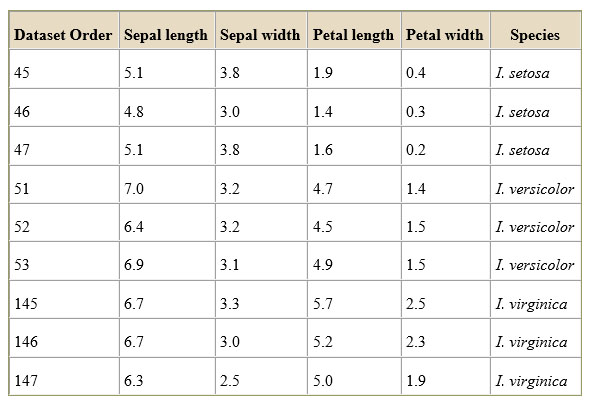

The task, T, which is what we want to solve is to learn to guess the species knowing the sepal and petal measurements.

Let's get started by import the dataset



In [58]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

You can see that data is an array which contains sepal length, sepal width, petal length, petal width. 

Also, you can see that target array corresponds to each instance of Iris species (0: sentosa, 1: versicolor,  and 2: virginica).

Let's find out more about the dataset.

In [59]:
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


You will realized that X_iris is a 2 dimensional table comprises of 150 rows and 4 columns. Y_iris is one-dimensional table comprises of 150 rows.

Print out one row of dataset.




In [60]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0



Let's get the data for the first two attributes.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X, y = X_iris[0:150, 0:2], y_iris

* X_iris[0:159, 0:2] means you are slicing from 0 (inclusive) to 150 (exclusive). The format is start:end:step. If you do not specify explicitly, it is default to 1 for step.



### **Split dataset into training and testing set**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


Test set will be 25% taken randomly

Standarize the Features

In [63]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


The **train_test_split** function automatically build the training and evaluation datasets. The last three lines of modify the training set in a process called **feature scaling**. For each feature, calculate the average, subtract the mean value from the feature value, and divide the result by their standard deviation. After scaling, each feature will have a zero average, with a standard deviation of one. This standardization of values is a common requirement of machine learning methods, to avoid that features with large values may weight too much on the final results. 

Next, we plot our training instances in the two-dimensional space using pyplot, from matplotlib library.

Text(0, 0.5, 'Sepal width')

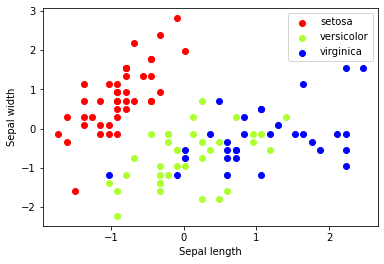

In [64]:
import matplotlib.pyplot as plt
colors=['red','greenyellow','blue']
for i in range(len(colors)):
  xs = X_train[:,0][y_train == i]
  ys = X_train[:,1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

If you look at the picture, we can see the separation between red dots (corresponding to setosa) and green and blue dots (corresponding to versicolor and virginica) is quite clear, while separating green from blue dots seems a very difficult tasks. 

We further redefine our learning task: suppose we aim, given an Iris flower, to predict if it is a setosa or not. We have converted our problem into a binary classification task (only two possible values). 

We are using linear classification method that is build a line that best separates both the target classes and use it as a decision boundary. 

To implement linear classification, we use the **SGDClassifier** from scikit-learn. SGD stands for Stochastic Gradient Descent, a very popular numerical procedure to find the local minimum of a function (in this case, the loss function, which measures how far every instance is from our boundary). The algorithm will learn the coefficients of the hyperplane by minimizing the loss function.


To use any method in scikit-learn, we must create the corresponding classifier object, initialize its parameters, and train the model that better fits the training data. 

In [65]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

The **fit** function is the most important function in scikit-learn. It receives the training data and the training classes, and builds the classifier. Every supervised learning method in scikit-learn implements this function.

The **coef_** attribute of the clf object has the coefficients of the linear boundary and **intercept_** attribute, the point of intersection of the line with the y axis. To print them, run the code below.


In [66]:
print(clf.coef_)
print(clf.intercept_)

[[-28.69106359  14.08790617]
 [ -2.03736966  -4.9845543 ]
 [  2.96594226   2.1849064 ]]
[-18.67513969  -0.93094768  -8.81135971]


Indeed in the real plane, with these three values, we can draw a line, represented by the following equation: -18.55116505 -27.07165569 * x1 + 17.78204246 * x2 = 0

Now, given x1 and x2, we just have to compute the value of the left-side of the equation: if its value is greater than zero, then the point is above the decision boundary (the red side), otherwise it will be beneath the line (the green or blue side). Our prediction algorithm will simply check this check and predict the corresponding class for any new iris flower.



The following code draws the three decision boundaries and lets us know if they worked as expected: 

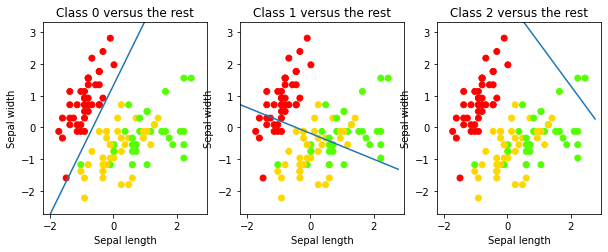

In [67]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() +  .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)


The first plot shows the model built for our original binary problem. It looks like the line separates quite well the Iris setosa from the rest. For the other two tasks, there are several points that lie on the wrong side of the hyperplane.


Now, suppose we have a new flower with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply our brand new classifier to it.

Applying  our classifier

In [68]:
print(clf.predict(scaler.transform([[5.1, 3.5]])))

[0]


Based on the output of [0], our classifier is right, this Iris flower is a setosa!

## Evaluating our result

The performance of a classifier is a measure of its effectiveness. Let’s test the accuracy on the training set.

Print metrics of training set

In [76]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print("%.2f%% of the training dataset are correctly classified by our classifier"%(metrics.accuracy_score(y_train, y_train_pred)*100))

76.79% of the training dataset are correctly classified by our classifier


Print metrics of testing set

In [78]:
y_pred = clf.predict(X_test)
print("%.2f%% of the testing dataset are correctly classified by our classifier"%(metrics.accuracy_score(y_test, y_pred)*100))

60.53% of the testing dataset are correctly classified by our classifier


Within scikit-learn, there are several evaluation functions namely precision, recall, and F1-score. 

In more details,
* **Precision**: This computes the proportion of instances predicted as positives that were correctly evaluated (it measures how right our classifier is when it says that an instance is positive).
* **Recall**: This counts the proportion of positive instances that were correctly evaluated (measuring how right our classifier is when faced with a positive instance).
* **F1-score**: This is the harmonic mean of precision and recall, and tries to combine both in a single number.

Let’s see it in practice.  Print metrics classification report


In [79]:
print(metrics.classification_report(y_test,y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      1.00      0.59        11
   virginica       1.00      0.21      0.35        19

    accuracy                           0.61        38
   macro avg       0.81      0.74      0.65        38
weighted avg       0.83      0.61      0.56        38



What we can see in this table is
* The classifier obtained 1.0 precision and recall in the setosa class. This means that for precision, 100 percent of the instances that are classified as setosa are really setosa instances, and for recall, that 100 percent of the setosa instances were classified as setosa.
* On the other hand, in the versicolor class, the results are not as good: we have a precision of 0.43, that is, only 43 percent of the instances that are classified as versicolor are really versicolor instances. Also, for versicolor, we have a recall of 0.27, that is, only 27 percent of the versicolor instances are correctly classified.

Now, we can see that our method (as we expected) is very good at predicting setosa, while it suffers when it has to separate the versicolor or virginica classes. The support value shows how many instances of each class we had in the testing set.

To finish our evaluation process, we will introduce a useful method called cross-validation. As we explained before, we have to partition our dataset into a training set and a testing set. However, partitioning the data, results such that there are fewer instances to train on, and also, depending on the particular partition we make, we can get either better or worse results. The usual steps for k-fold cross-validation are as follows:
* Partition the dataset into k different subsets.
* Create k different models by training on k-1 subsets and testing on the remaining subset.
* Measure the performance on each of the k models and take the average measure.

Let's do that with our linear classifier. First, we will have to create a composite estimator made by a pipeline of the standardization and linear models. With this technique, we make sure that each iteration will standardize the data and then train/test on the transformed data. The Pipeline class is also useful to simplify the construction of more complex models that chain-multiply the transformations. We will chose to have k = 5 folds, so each time we will train on 80 percent of the data and test on the remaining 20 percent. Cross-validation, by default, uses accuracy as its performance measure, but we could select the measurement by passing any scorer function as an argument.

Let's implement our kfold implementation.


In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
clf = Pipeline([('scaler',preprocessing.StandardScaler()),
                ('linear_model',SGDClassifier())])

cv = KFold(5, shuffle=True, random_state=33)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[0.66666667 0.73333333 0.73333333 0.93333333 0.63333333]


The above code create a composite estimator made by a pipeline of the standarization and the linear model. In addition, a k-fold cross validation iterator of k=5 folds is created. 

We obtained an array with the k scores. We can calculate the mean and the standard error to obtain a final figure:

In [89]:
from scipy.stats import sem
def mean_scores(scores):
  return ("Mean score {0:.3f}(+/-{1:.3f})").format(np.mean(scores), sem(scores))
print(mean_scores(scores))

Mean score 0.740(+/-0.052)


References:
1.	http://scikit-learn.org/stable/auto_examples
2.	http://scikit-learn.org
3.	http://proquestcombo.safaribooksonline.com/book/programming/machine-learning/9781788833479/scikit-learn-machine-learning-simplified/pt01_html#X2ludGVybmFsX0h0bWxWaWV3P3htbGlkPTk3ODE3ODg4MzM0NzklMkZjaDAxX2h0bWwmcXVlcnk9
